In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from scipy.stats import multivariate_normal
import math

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale


In [31]:
def N(x, mean, cov):
    n = len(mean)
    denom = np.sqrt(np.power(2 * np.pi, n) * np.linalg.det(cov))
    sub = np.matrix([x - mean])
    nume = np.exp((-1.0 / 2) * sub * np.linalg.inv(cov) * sub.T)
    return float(nume / denom)


def E_step(X, W_mix, M_mix, S_mix):

    n = len(X)  # number of objects
    k = len(W_mix)  # number of clusters
    G = np.zeros((n, k))

    for i in range(n):  # for each object in X
        denom = np.sum([W_mix[j] * N(X[i], M_mix[j], S_mix[j]) for j in range(k)])
        for j in range(k):
            num = W_mix[j] * N(X[i], M_mix[j], S_mix[j])
            G[i][j] = num / denom
    return G


def M_step(X, G):  # returns W_mix, M_mix, S_mix

    k = G.shape[1]  # number of clusters
    q = X.shape[1]  # number of dimensions
    n = X.shape[0]  # number of objects

    W_mix = np.sum(G, axis=0) / n  # recalc W

    M_mix = np.zeros((k, q))
    for j in range(k):
        M_mix[j] = np.sum([G[i][j] * X[i] for i in range(n)], axis=0) / np.sum(G, axis=0)[j]

    S_mix = np.zeros((k, q, q))
    for j in range(k):
        S_mix[j] = (
            np.sum([G[i][j] * np.matrix(X[i] - M_mix[j]).T * np.matrix(X[i] - M_mix[j]) for i in range(n)], axis=0)
            / np.sum(G, axis=0)[j]
        )
        # S_mix[j] = np.triu(S_mix[j], 1) + np.tril(S_mix[j])
    S_mix = np.where(S_mix < 0, 0, S_mix)

    return W_mix, M_mix, S_mix


def predict(G):
    n = len(G)  # number of objects
    answers = []

    for i in range(n):
        res = np.argmax(G[i])
        answers.append(res)
    return np.array(answers)


Итерация № 5
Изменение дистанции между матрицами мат. ожиданий 	 0.05050348970642576
Доля правильно распознанных изделий 	 0.427
Матрица весов [0.33334031 0.3340686  0.3325911 ]


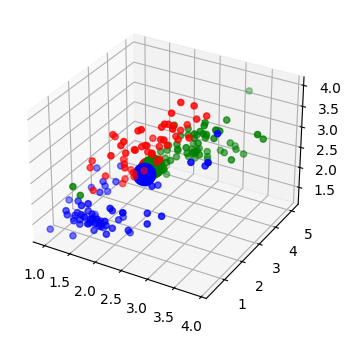

Итерация № 10
Изменение дистанции между матрицами мат. ожиданий 	 0.189908133738007
Доля правильно распознанных изделий 	 0.416
Матрица весов [0.3296221  0.32487316 0.34550474]


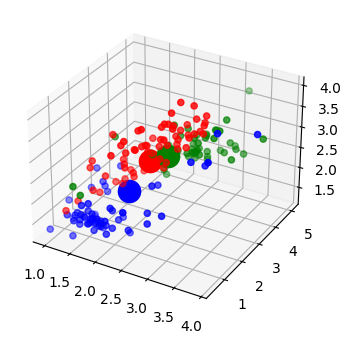

Итерация № 15
Изменение дистанции между матрицами мат. ожиданий 	 0.1425360981125074
Доля правильно распознанных изделий 	 0.472
Матрица весов [0.30517515 0.33802518 0.35679966]


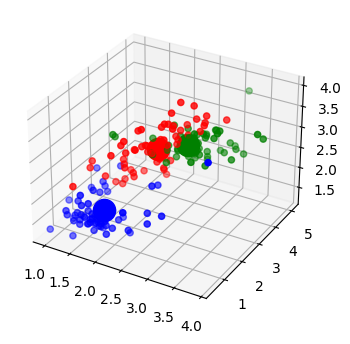

Итерация № 20
Изменение дистанции между матрицами мат. ожиданий 	 0.03400043927363632
Доля правильно распознанных изделий 	 0.567
Матрица весов [0.37727551 0.30234575 0.32037875]


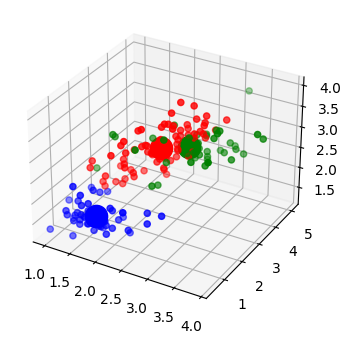

Итерация № 25
Изменение дистанции между матрицами мат. ожиданий 	 0.009743960515263925
Доля правильно распознанных изделий 	 0.59
Матрица весов [0.43728097 0.25891507 0.30380396]


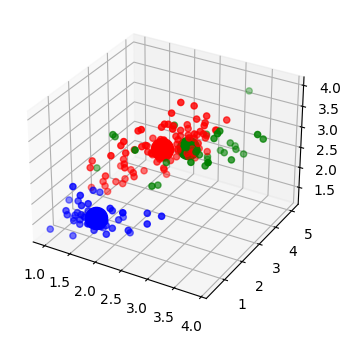

In [48]:
wine = load_wine()
X = wine.data
y = wine.target

X = X[:, [5, 6, 11]]

n = X.shape[0]
k = 3
q = X.shape[1]

W_mix = np.array([float(1.0 / k)] * k)
np.random.seed(seed=None)
M_mix = np.array((np.mean(X[np.random.choice(n, int(n / k))], axis=0), np.mean(X[np.random.choice(n, int(n / k))], axis=0), np.mean(X[np.random.choice(n, int(n / k))], axis=0)))
S_mix = np.array(([[3, 1, 2], [1, 3, 1], [2, 1, 3]], [[3, 1, 2], [1, 3, 1], [2, 1, 3]], [[3, 1, 2], [1, 3, 1], [2, 1, 3]]))

max_steps = 50
M_mix_0 = np.zeros((k, q))
iteration = 0

while (np.linalg.norm(M_mix - M_mix_0) > 0.01) and (iteration < max_steps):
    M_mix_0 = M_mix
    iteration += 1
    
    G = E_step(X, W_mix, M_mix, S_mix)
    W_mix, M_mix, S_mix = M_step(X, G)
    answers = predict(G)
    
    if not (iteration + 1) % 5:
        print("Итерация №", iteration + 1)
        print("Изменение дистанции между матрицами мат. ожиданий \t", np.linalg.norm(M_mix - M_mix_0))
        print("Доля правильно распознанных изделий \t", round(accuracy_score(y, answers), 3))
        print("Матрица весов", W_mix)
        # print("Матрица значений математических ожиданий \t", M_mix)
        # print("Матрица значений стандартных отклонений \t", S_mix)

        fig = plt.figure(figsize=(4, 4))
        ax = plt.axes(projection="3d")
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=np.array(["r", "g", "b"])[answers])
        ax.plot(M_mix[0][0], M_mix[0][1], M_mix[0][2], 'o', markersize = 16, color = 'r')
        ax.plot(M_mix[1][0], M_mix[1][1], M_mix[1][2], 'o',  markersize = 16, color = 'g')
        ax.plot(M_mix[2][0], M_mix[2][1], M_mix[2][2], 'o',  markersize = 16, color = 'b')
        plt.show()



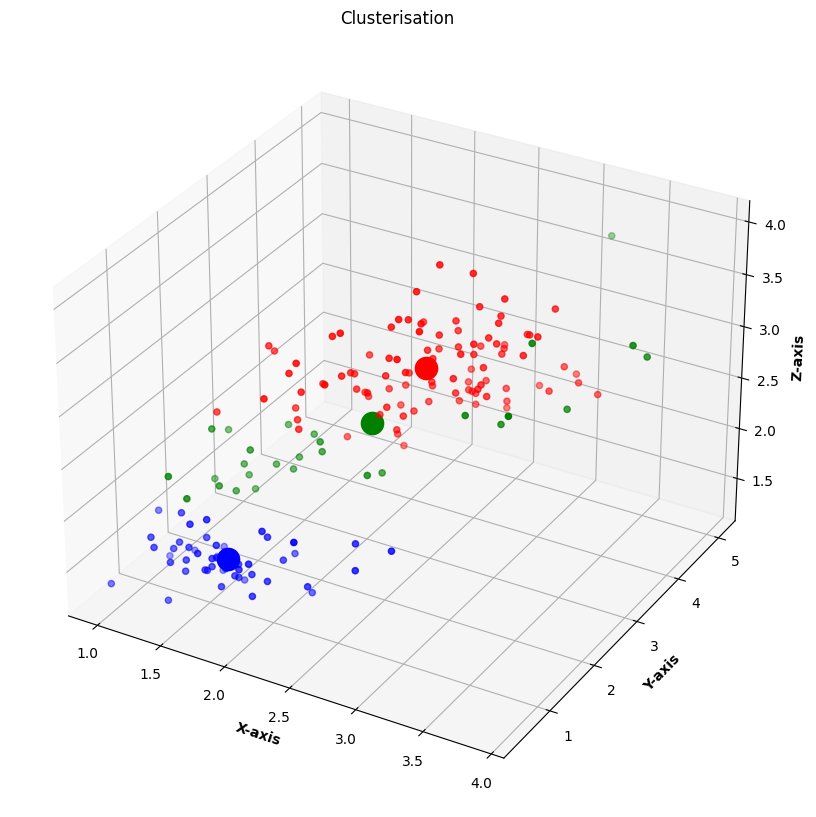

In [46]:
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection="3d")
colormap = np.array(["r", "g", "b"])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=colormap[answers])
ax.plot(M_mix[0][0], M_mix[0][1], M_mix[0][2], 'o', markersize = 16, color = 'r')
ax.plot(M_mix[1][0], M_mix[1][1], M_mix[1][2], 'o',  markersize = 16, color = 'g')
ax.plot(M_mix[2][0], M_mix[2][1], M_mix[2][2], 'o',  markersize = 16, color = 'b')
plt.title("Clusterisation")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()


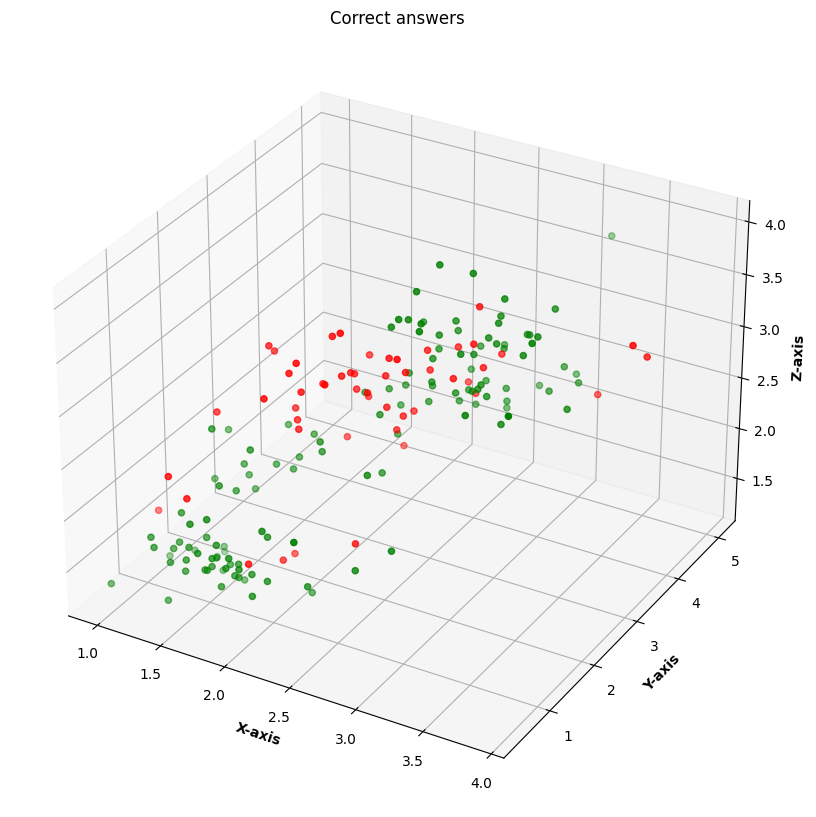

In [47]:
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection="3d")
colormap = np.array(["r", "g"])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=colormap[(answers == y) + 0])
plt.title("Correct answers")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [83]:
print("class", "precision", "recall", sep="\t")
for j in range(k):
    print(j, round(sum(y[answers == j] == j) / len(y[answers == j]), 3), round(sum(y[answers == j] == j) / sum(y == j), 3), sep="\t")

class	precision	recall
0	0.689	0.525
1	0.078	0.056
2	0.012	0.021


In [51]:
from sklearn.mixture import GaussianMixture as GMM

wine = load_wine()
X = wine.data
y = wine.target
X = X[:, [5, 6, 11]]

model = GMM(n_components=k, covariance_type="full")
model.fit(X)
answers = model.predict(X)

print(round(accuracy_score(y, answers), 3))

0.202
